## **Classificação Binária IMDB**

**Livro: Deep Learning With python**

**3.4 - Classificação Binária**

Para mais detalhes e explicação completa do código visite: 

O objetivo desse código é desenvolver um modelo que consiga realizar a classificação de reviews de filmes no IMBD, a classificação será "positiva" para um review com opiniões positivas, e "negativo" para um review com opiniões negativas. 

O dataset faz parte do pacote keras e pode encontrar mais detalhes no site: 
https://keras.io/api/datasets/imdb/



In [1]:
#Importando o dataset IMDB (lembrando que faz parte do pacote keras)
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]  #Visualizando o primeiro dado do train_data

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0] #visualizando o primeiro dado do train_labels

1

In [4]:
#a quantidade máquina de valores por dados. Como o num_word é 10000, o máximo de sequencia do train_data é 9999 (já que começa por 0)
max([max(sequence) for sequence in train_data])

9999

In [5]:
#"Traduzindo" um dados (o quinto nesse caso) para o inglês
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
  [reverse_word_index.get(i - 3, '?') for i in test_data[5]])
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap ? it deserves the real thing i'm them now this movie will be on dvd"

#Pré-processamento
Antes de enviar os dados para a rede neural precisamos realizar um Pré-processamento desses dados. 


In [6]:
#importando o pacote numpy
import numpy as np

In [7]:
#criando uma função que normalize os valores
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
   results[i, sequence] = 1.
  return results

In [8]:
#passando os valores de train_data e test_data na função de vetorização
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
#visualização dos dados (agora as palavras tem valor de 0 ou 1)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
#normalização?
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Contrução do modelo

In [11]:
#para construção do modelo é preciso fazer a importação do 'models' e 'layers'
from keras import models
from keras import layers

In [12]:
#Modelo:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #uma camada densa, com input 10000, output 16
model.add(layers.Dense(16, activation='relu')) #camada densa entrada 16, saída 16
model.add(layers.Dense(1, activation='sigmoid')) #camada densa entrada 16, saída 1

In [13]:
#Alguns atributos do modelo:

model.compile(optimizer='rmsprop', #otimizador
loss='binary_crossentropy', #função de perda
metrics=['accuracy']) #métrica de avaliação do modelo


In [14]:
#tirando alguns valores do treinamento para servirem como validação
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
#Compilação do modelo

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5099 - acc: 0.7817 - val_loss: 0.3762 - val_acc: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2982 - acc: 0.9066 - val_loss: 0.3031 - val_acc: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2226 - acc: 0.9291 - val_loss: 0.2795 - val_acc: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1760 - acc: 0.9438 - val_loss: 0.2797 - val_acc: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1407 - acc: 0.9571 - val_loss: 0.2849 - val_acc: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1143 - acc: 0.9659 - val_loss: 0.2932 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0969 - acc: 0.9723 - val_loss: 0.3112 - val_acc: 0.8830
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0807 - a

In [16]:
#Historico do treinamento:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
#importando a biblioteca para plotar os gráficos
import matplotlib.pyplot as plt

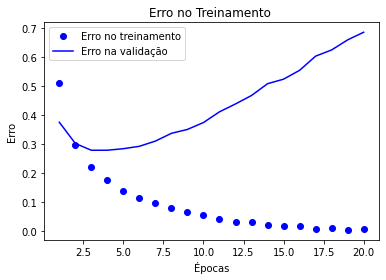

In [18]:
#Plotando o gráfico de epoca x erro. 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Erro no treinamento')
plt.plot(epochs, val_loss_values, 'b', label='Erro na validação')
plt.title('Erro no Treinamento ')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

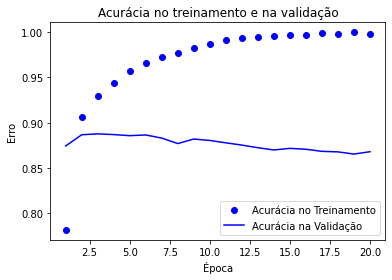

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Acurácia no Treinamento')
plt.plot(epochs, val_acc_values, 'b', label='Acurácia na Validação')
plt.title('Acurácia no treinamento e na validação')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()
plt.show()

Percebemos que o modelo tem uma brusca caída de desenpenho depois da 4 época de treinamento. Então vamos treinar o modelo novamente, porém com apenas 4 épocas. 

In [20]:
#treinamento o modelo com 4 epocas
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4657 - accuracy: 0.8194
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2664 - accuracy: 0.9087
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2022 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2943 - accuracy: 0.8834


In [21]:
results
#alcançou uma acurácia de 88,3%

[0.29434964060783386, 0.883400022983551]